# FANTASY FOOTBALL POINT PREDICTION

### DATASET COLUMNS
- **PLAYER NAME:** Name of the player.
- **PLAYER TEAM:** The team to which the player belongs.
- **PLAYER POSITION:** Position played by the player (e.g., quarterback, running back, wide receiver).
- **LOC:** Location of the game (home or away).
- **OPP:** Opponent team.
- **STATUS:** Player's status (e.g., active, injured).
- **PROJ:** Projected performance.
- **PASSING C/A:** Passing completions/attempts.
- **PASSING YDS:** Passing yards.
- **PASSING TD:** Passing touchdowns.
- **PASSING INT:** Passing interceptions.
- **RUSHING CAR:** Rushing attempts.
- **RUSHING YDS:** Rushing yards.
- **RUSHING TD:** Rushing touchdowns.
- **RECEIVING REC:** Receptions.
- **RECEIVING YDS:** Receiving yards.
- **RECEIVING TD:** Receiving touchdowns.
- **RECEIVING TAR:** Receiving targets.
- **MISC 2PC:** Miscellaneous 2-point conversions.
- **MISC FUML:** Miscellaneous fumbles.
- **MISC TD:** Miscellaneous touchdowns.
- **TOTAL:** Overall total or combined score.


### POINT CALCULATION
This algorithm is based on point per reception, the below equations show how different factors affect a player's total calculated score after a game.

**Quarterback (QB):**
- **Passing Points:**
  - Passing Points = (Passing Yards / Yardage Points) + (Passing Touchdowns * Touchdown Points) - (Interceptions * Interception Points)

**Running Back (RB):**
- **Rushing Points:**
  - Rushing Points = (Rushing Yards / Rushing Yardage Points) + (Rushing Touchdowns * Touchdown Points)
- **Receiving Points:**
  - Receiving Points = (Receptions * Reception Points) + (Receiving Yards / Receiving Yardage Points) + (Receiving Touchdowns * Touchdown Points)
- **Total Points for RB:**
  - Total Points = Rushing Points + Receiving Points

**Wide Receiver (WR):**
- **Receiving Points:**
  - Receiving Points = (Receptions * Reception Points) + (Receiving Yards / Receiving Yardage Points) + (Receiving Touchdowns * Touchdown Points)

**Tight End (TE):**
- **Receiving Points:**
  - Receiving Points = (Receptions * Reception Points) + (Receiving Yards / Receiving Yardage Points) + (Receiving Touchdowns * Touchdown Points)


# Imported Libraries

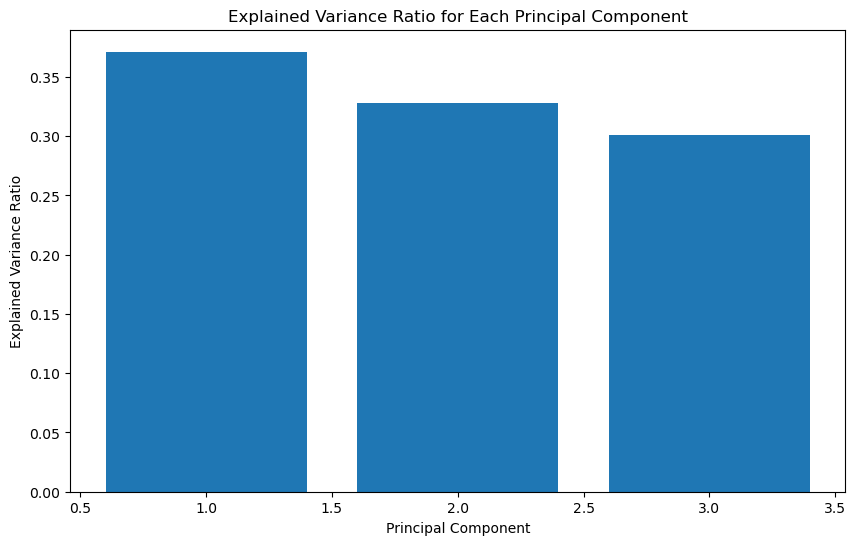

In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt


## Initial Data Visualization

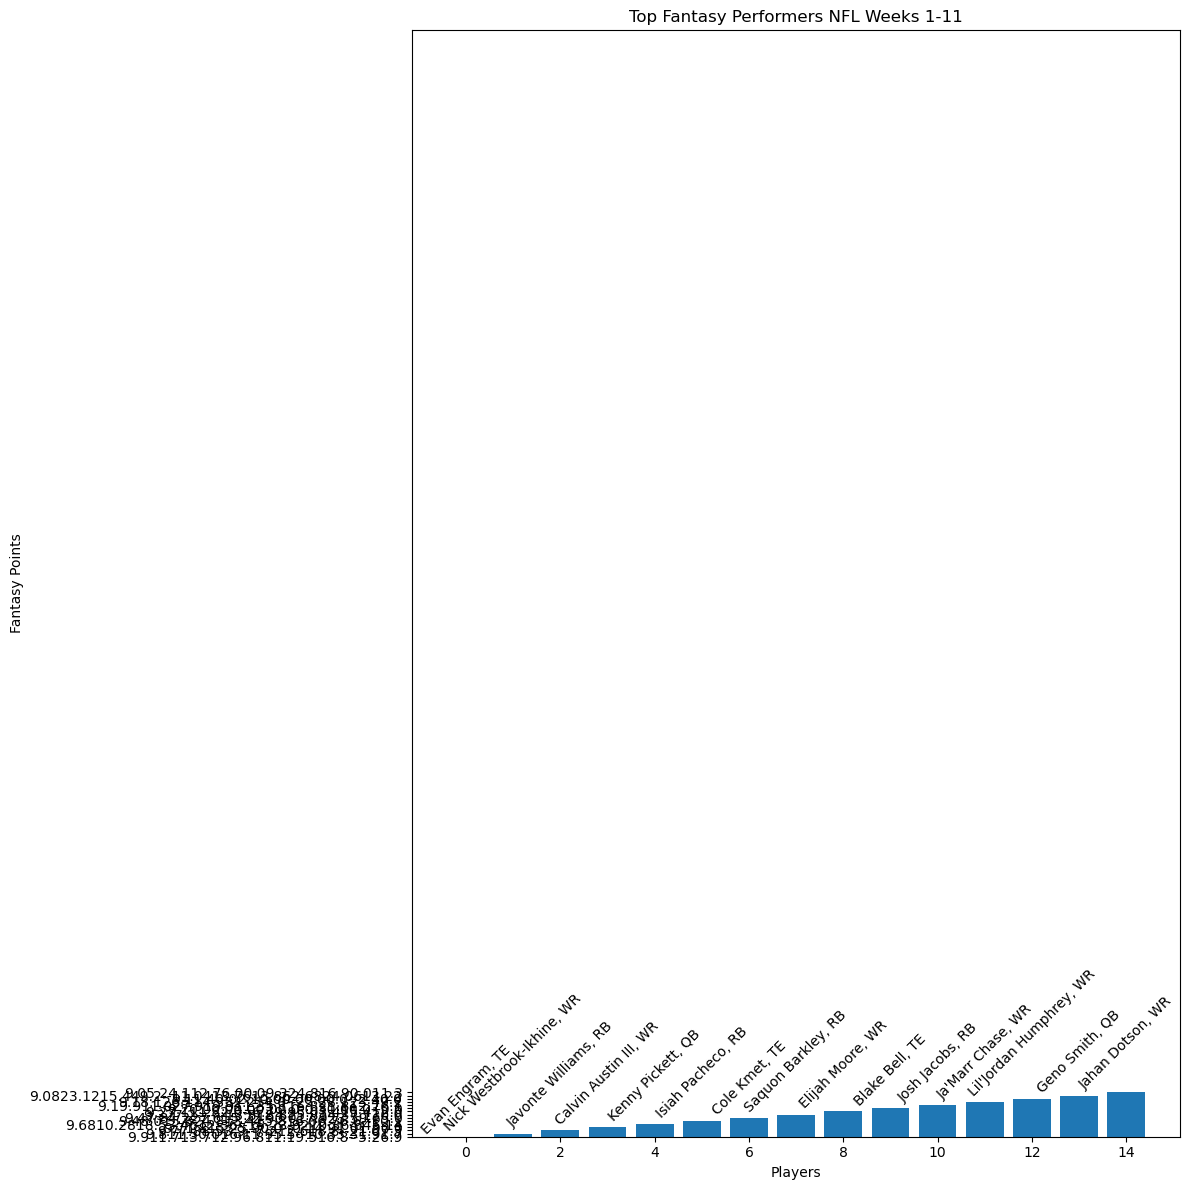

In [45]:

# Import necessary libraries
from IPython.display import IFrame
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kde
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd
import seaborn as sns
import networkx as nx

# Define the file path
file_path = r'C:\Users\admin\Desktop\MEMT680\final_project\src\final_project\FantasyFootballWeekly.csv'

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('FantasyFootballWeekly.csv')

# Group the data by player name and calculate the total fantasy points for each player
total_points = df.groupby('PLAYER NAME')['TOTAL'].sum().reset_index()

# Sort the players based on total fantasy points in descending order
total_points = total_points.sort_values(by='TOTAL', ascending=False)

# Select the top 15 performers
top_performers = total_points.head(15)

# Create a bar chart
plt.figure(figsize=(12, 12))
bars = plt.bar(range(len(top_performers['PLAYER NAME'])), top_performers['TOTAL'])

# Add player names and positions as data labels
for i, bar in enumerate(bars):
    player_name = top_performers['PLAYER NAME'].iloc[i]
    player_position = df[df['PLAYER NAME'] == player_name]['PLAYER POSITION'].iloc[0]
    text_label = f"{player_name}, {player_position}"
    
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             text_label,
             ha='center', va='bottom', rotation=45)

# Customize the plot
plt.xlabel('Players')
plt.ylabel('Fantasy Points')
plt.title('Top Fantasy Performers NFL Weeks 1-11')
plt.ylim(0, 350)
plt.tight_layout()

plt.show()


In [46]:
import dash
from dash import dcc, html
import plotly.express as px
import pandas as pd

# Define the file path
file_path = r'C:\Users\admin\Desktop\MEMT680\final_project\src\final_project\FantasyFootballWeekly.csv'

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('FantasyFootballWeekly.csv')

# Initialize the Dash app
app = dash.Dash(__name__)

# Define the layout of the app
app.layout = html.Div([
    html.H1("Fantasy Football Player Comparison"),
    
    # Dropdown for selecting player position
    html.Label("Select Player Position:"),
    dcc.Dropdown(
        id='position-dropdown',
        options=[
            {'label': position, 'value': position} for position in df['PLAYER POSITION'].unique() if position is not None and pd.notna(position)
        ],
        value='QB',  # default value
        style={'width': '50%'}
    ),
    
    # Dropdown for selecting Player 1 Team
    html.Label("Select Player 1 Team:"),
    dcc.Dropdown(
        id='team1-dropdown',
        options=[
            {'label': team, 'value': team} for team in df['PLAYER TEAM'].unique() if team is not None and pd.notna(team)
        ],
        value='Phi',  # default value
        style={'width': '50%'}
    ),
    
    # Dropdown for selecting Player 2 Team
    html.Label("Select Player 2 Team:"),
    dcc.Dropdown(
        id='team2-dropdown',
        options=[
            {'label': team, 'value': team} for team in df['PLAYER TEAM'].unique() if team is not None and pd.notna(team)
        ],
        value='Dal',  # default value
        style={'width': '50%'}
    ),
    
    # Dropdown for selecting Player 1 Name
    html.Label("Select Player 1 Name:"),
    dcc.Dropdown(
        id='player1-dropdown',
        style={'width': '50%'}
    ),
    
    # Dropdown for selecting Player 2 Name
    html.Label("Select Player 2 Name:"),
    dcc.Dropdown(
        id='player2-dropdown',
        style={'width': '50%'}
    ),
    
    # Bar plot based on player stats
    dcc.Graph(id='player-comparison-plot'),
])

# Define callback to update Player 1 Name dropdown based on selected team and position
@app.callback(
    dash.dependencies.Output('player1-dropdown', 'options'),
    [dash.dependencies.Input('team1-dropdown', 'value'),
     dash.dependencies.Input('position-dropdown', 'value')]
)
def update_player1_dropdown(selected_team1, selected_position):
    if selected_team1 is not None:
        player1_options = [
            {'label': player, 'value': player} for player in
            sorted(df[(df['PLAYER TEAM'] == selected_team1) & (df['PLAYER POSITION'] == selected_position)]['PLAYER NAME'].unique())
        ]
    else:
        player1_options = []
    
    return player1_options

# Define callback to update Player 2 Name dropdown based on selected team and position
@app.callback(
    dash.dependencies.Output('player2-dropdown', 'options'),
    [dash.dependencies.Input('team2-dropdown', 'value'),
     dash.dependencies.Input('position-dropdown', 'value')]
)
def update_player2_dropdown(selected_team2, selected_position):
    if selected_team2 is not None:
        player2_options = [
            {'label': player, 'value': player} for player in
            sorted(df[(df['PLAYER TEAM'] == selected_team2) & (df['PLAYER POSITION'] == selected_position)]['PLAYER NAME'].unique())
        ]
    else:
        player2_options = []
    
    return player2_options

# Define callback to update the bar plot based on user input
@app.callback(
    dash.dependencies.Output('player-comparison-plot', 'figure'),
    [dash.dependencies.Input('position-dropdown', 'value'),
     dash.dependencies.Input('player1-dropdown', 'value'),
     dash.dependencies.Input('player2-dropdown', 'value')]
)
def update_player_comparison_plot(selected_position, selected_player1, selected_player2):
    # Bar plot based on player stats for the selected position
    if selected_position == 'QB':
        stats_labels = ['RUSHING TD', 'PASSING TD']
    elif selected_position in ['RB', 'WR', 'TE']:
        stats_labels = ['RECEIVING TAR', 'MISC TD', 'RECEIVING TD', 'RUSHING TD']
    else:
        return px.bar(), "Invalid player position selected."

    filtered_df_player1 = df[(df['PLAYER NAME'] == selected_player1) & (df['PLAYER POSITION'] == selected_position)]
    filtered_df_player2 = df[(df['PLAYER NAME'] == selected_player2) & (df['PLAYER POSITION'] == selected_position)]

    # Combine data for both players
    combined_df = pd.concat([filtered_df_player1, filtered_df_player2], ignore_index=True)


    fig = px.bar(
        combined_df.melt(id_vars='PLAYER NAME', value_vars=stats_labels),
        x='variable',
        y='value',
        color='PLAYER NAME',
        title=f'{selected_player1} vs {selected_player2} ({selected_position}) Comparison',
        labels={'variable': 'Stat', 'value': 'Value'},
        barmode='group',
        height=400
    )


    return fig

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


## Data Cleaning

The following process cleans out all empty datapoints

In [47]:

# Define the file path
file_path = r'C:\Users\admin\Desktop\MEMT680\final_project\src\final_project\FantasyFootballWeekly.csv'


# Read the CSV file into a pandas DataFrame
df_before_cleaning = pd.read_csv('FantasyFootballWeekly.csv')

# Display the number of rows and columns before cleaning
print("Number of rows before cleaning:", df_before_cleaning.shape[0])
print("Number of columns before cleaning:", df_before_cleaning.shape[1])

# Replace "--" with NaN and drop rows containing NaN
df_before_cleaning.replace("--", pd.NA, inplace=True)
df_before_cleaning.dropna(inplace=True)

# Split 'PASSING C/A' into two columns and drop the original column
df_before_cleaning[['PASSING_C', 'PASSING_A']] = df_before_cleaning['PASSING C/A'].str.split('/', expand=True)
df_before_cleaning.drop(columns=['PASSING C/A'], inplace=True)

# Display the number of rows and columns after cleaning
print("\nNumber of rows after cleaning:", df_before_cleaning.shape[0])
print("Number of columns after cleaning:", df_before_cleaning.shape[1])

# Save the cleaned DataFrame back to a CSV file
cleaned_file_path = file_path.replace('.csv', '_cleaned.csv')
df_before_cleaning.to_csv(cleaned_file_path, index=False)



Number of rows before cleaning: 11055
Number of columns before cleaning: 22

Number of rows after cleaning: 4233
Number of columns after cleaning: 23


## Data Visualization After Cleaning

c:\Users\admin\anaconda3\Lib\site-packages\matplotlib\collections.py:1080: UserWarning:

Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


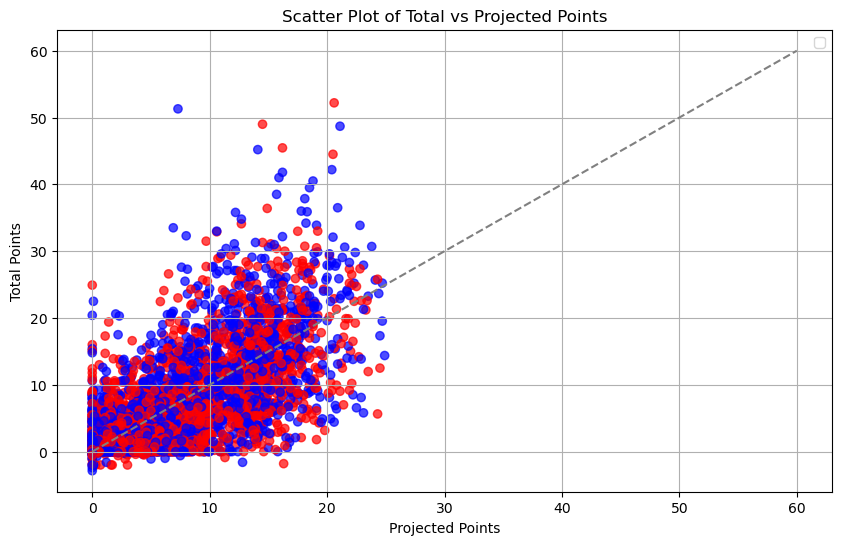

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the cleaned dataset
df = pd.read_csv('FantasyFootballWeekly_cleaned.csv')

# Scatter plot with color-coded points
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['PROJ'], df['TOTAL'], c=df['LOC'].map({'Home': 'blue', 'Away': 'red'}), alpha=0.7)

# Add diagonal line (x=y)
plt.plot([0, 60], [0, 60], linestyle='--', color='gray')

# Customize the plot
plt.title('Scatter Plot of Total vs Projected Points')
plt.xlabel('Projected Points')
plt.ylabel('Total Points')
plt.legend(handles=scatter.legend_elements()[0], labels=['Home', 'Away'])
plt.grid(True)
plt.show()


In [49]:
import dash
from dash import dcc, html
import plotly.express as px
import pandas as pd

# Define the file path
file_path = r'C:\Users\admin\Desktop\MEMT680\final_project\src\final_project\FantasyFootballWeekly_cleaned.csv'

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('FantasyFootballWeekly_cleaned.csv')

# Initialize the Dash app
app = dash.Dash(__name__)

# Define the layout of the app
app.layout = html.Div([
    html.H1("Fantasy Football Player Comparison"),
    
    # Dropdown for selecting player position
    html.Label("Select Player Position:"),
    dcc.Dropdown(
        id='position-dropdown',
        options=[
            {'label': position, 'value': position} for position in df['PLAYER POSITION'].unique() if position is not None and pd.notna(position)
        ],
        value='QB',  # default value
        style={'width': '50%'}
    ),
    
    # Dropdown for selecting Player 1 Team
    html.Label("Select Player 1 Team:"),
    dcc.Dropdown(
        id='team1-dropdown',
        options=[
            {'label': team, 'value': team} for team in df['PLAYER TEAM'].unique() if team is not None and pd.notna(team)
        ],
        value='Phi',  # default value
        style={'width': '50%'}
    ),
    
    # Dropdown for selecting Player 2 Team
    html.Label("Select Player 2 Team:"),
    dcc.Dropdown(
        id='team2-dropdown',
        options=[
            {'label': team, 'value': team} for team in df['PLAYER TEAM'].unique() if team is not None and pd.notna(team)
        ],
        value='Dal',  # default value
        style={'width': '50%'}
    ),
    
    # Dropdown for selecting Player 1 Name
    html.Label("Select Player 1 Name:"),
    dcc.Dropdown(
        id='player1-dropdown',
        style={'width': '50%'}
    ),
    
    # Dropdown for selecting Player 2 Name
    html.Label("Select Player 2 Name:"),
    dcc.Dropdown(
        id='player2-dropdown',
        style={'width': '50%'}
    ),
    
    # Bar plot based on player stats
    dcc.Graph(id='player-comparison-plot'),
])

# Define callback to update Player 1 Name dropdown based on selected team and position
@app.callback(
    dash.dependencies.Output('player1-dropdown', 'options'),
    [dash.dependencies.Input('team1-dropdown', 'value'),
     dash.dependencies.Input('position-dropdown', 'value')]
)
def update_player1_dropdown(selected_team1, selected_position):
    if selected_team1 is not None:
        player1_options = [
            {'label': player, 'value': player} for player in
            sorted(df[(df['PLAYER TEAM'] == selected_team1) & (df['PLAYER POSITION'] == selected_position)]['PLAYER NAME'].unique())
        ]
    else:
        player1_options = []
    
    return player1_options

# Define callback to update Player 2 Name dropdown based on selected team and position
@app.callback(
    dash.dependencies.Output('player2-dropdown', 'options'),
    [dash.dependencies.Input('team2-dropdown', 'value'),
     dash.dependencies.Input('position-dropdown', 'value')]
)
def update_player2_dropdown(selected_team2, selected_position):
    if selected_team2 is not None:
        player2_options = [
            {'label': player, 'value': player} for player in
            sorted(df[(df['PLAYER TEAM'] == selected_team2) & (df['PLAYER POSITION'] == selected_position)]['PLAYER NAME'].unique())
        ]
    else:
        player2_options = []
    
    return player2_options

# Define callback to update the bar plot based on user input
@app.callback(
    dash.dependencies.Output('player-comparison-plot', 'figure'),
    [dash.dependencies.Input('position-dropdown', 'value'),
     dash.dependencies.Input('player1-dropdown', 'value'),
     dash.dependencies.Input('player2-dropdown', 'value')]
)
def update_player_comparison_plot(selected_position, selected_player1, selected_player2):
    # Bar plot based on player stats for the selected position
    if selected_position == 'QB':
        stats_labels = ['RUSHING TD', 'PASSING TD']
    elif selected_position in ['RB', 'WR', 'TE']:
        stats_labels = ['RECEIVING TAR', 'MISC TD', 'RECEIVING TD', 'RUSHING TD']
    else:
        return px.bar(), "Invalid player position selected."

    filtered_df_player1 = df[(df['PLAYER NAME'] == selected_player1) & (df['PLAYER POSITION'] == selected_position)]
    filtered_df_player2 = df[(df['PLAYER NAME'] == selected_player2) & (df['PLAYER POSITION'] == selected_position)]

    # Combine data for both players
    combined_df = pd.concat([filtered_df_player1, filtered_df_player2], ignore_index=True)


    fig = px.bar(
        combined_df.melt(id_vars='PLAYER NAME', value_vars=stats_labels),
        x='variable',
        y='value',
        color='PLAYER NAME',
        title=f'{selected_player1} vs {selected_player2} ({selected_position}) Comparison',
        labels={'variable': 'Stat', 'value': 'Value'},
        barmode='group',
        height=400
    )


    return fig

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


# Supervised Machine Learning

### Linear Regression

R2 Score for QB: 0.5362614928718337
Mean Squared Error (MSE) for QB: 24.726438919014104


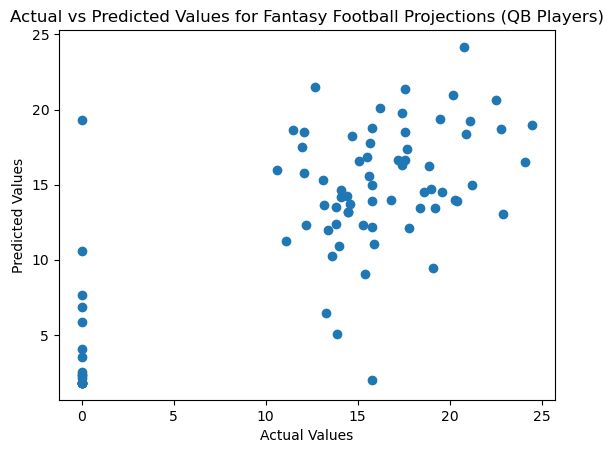

R2 Score for RB: 0.7270906478791646
Mean Squared Error (MSE) for RB: 9.370134126603746


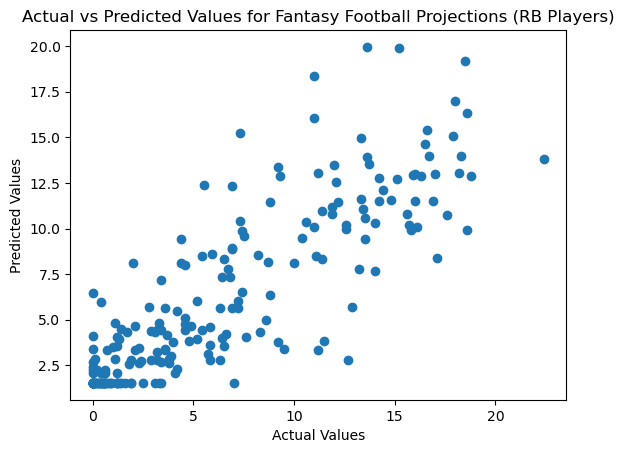

R2 Score for WR: 0.573157434337709
Mean Squared Error (MSE) for WR: 12.771223019506204


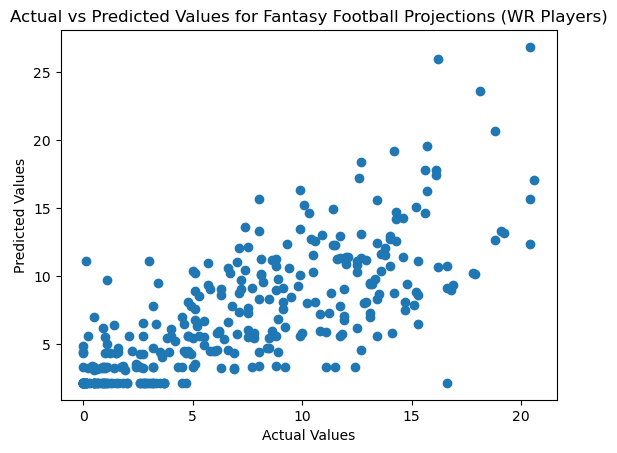

R2 Score for TE: 0.6618627735899776
Mean Squared Error (MSE) for TE: 6.161833888921882


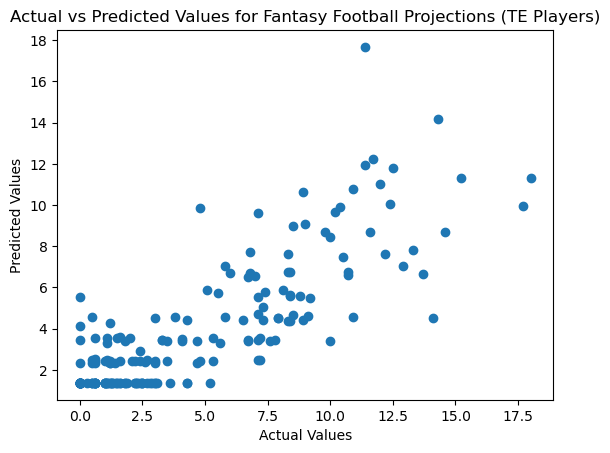

In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

def linear_regression_analysis(file_path, player_position):
    # Load the cleaned dataset
    df = pd.read_csv(file_path)

    # Filter the dataset to include only specific player position
    df_position = df[df['PLAYER POSITION'] == player_position]

    # Define features based on player position
    if player_position == 'QB':
        features = df_position[['PASSING_C', 'PASSING_A', 'PASSING YDS', 'PASSING TD', 'PASSING INT',
                                'RUSHING CAR', 'RUSHING YDS', 'RUSHING TD', 'RECEIVING REC',
                                'RECEIVING YDS', 'RECEIVING TD', 'RECEIVING TAR',
                                'MISC 2PC', 'MISC FUML', 'MISC TD']]
    elif player_position == 'RB':
        features = df_position[['RUSHING CAR', 'RUSHING YDS', 'RUSHING TD',
                                'RECEIVING REC', 'RECEIVING YDS', 'RECEIVING TD', 'RECEIVING TAR',
                                'MISC 2PC', 'MISC FUML', 'MISC TD']]
    elif player_position == 'WR':
        features = df_position[['RECEIVING REC', 'RECEIVING YDS', 'RECEIVING TD', 'RECEIVING TAR',
                                'MISC 2PC', 'MISC FUML', 'MISC TD']]
    elif player_position == 'TE':
        features = df_position[['RECEIVING REC', 'RECEIVING YDS', 'RECEIVING TD', 'RECEIVING TAR',
                                'MISC 2PC', 'MISC FUML', 'MISC TD']]
    else:
        raise ValueError(f"Invalid player position: {player_position}")

    # Target variable
    target = df_position['PROJ']

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

    # Create and train the linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions on the test set
    predictions = model.predict(X_test)

    # Calculate R2 score
    r2 = r2_score(y_test, predictions)
    print(f'R2 Score for {player_position}: {r2}')

    # Calculate Mean Squared Error (MSE)
    mse = mean_squared_error(y_test, predictions)
    print(f'Mean Squared Error (MSE) for {player_position}: {mse}')

    # Plotting predictions vs actual values
    plt.scatter(y_test, predictions)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Actual vs Predicted Values for Fantasy Football Projections ({player_position} Players)')
    plt.show()

# Perform linear regression analysis for QB players
linear_regression_analysis(cleaned_file_path, 'QB')

# Perform linear regression analysis for RB players
linear_regression_analysis(cleaned_file_path, 'RB')

# Perform linear regression analysis for WR players
linear_regression_analysis(cleaned_file_path, 'WR')

# Perform linear regression analysis for TE players
linear_regression_analysis(cleaned_file_path, 'TE')


### Random Forest Regression Model

Mean Squared Error (MSE): 12.556009502056249
R2 Score: 0.6541707840712265


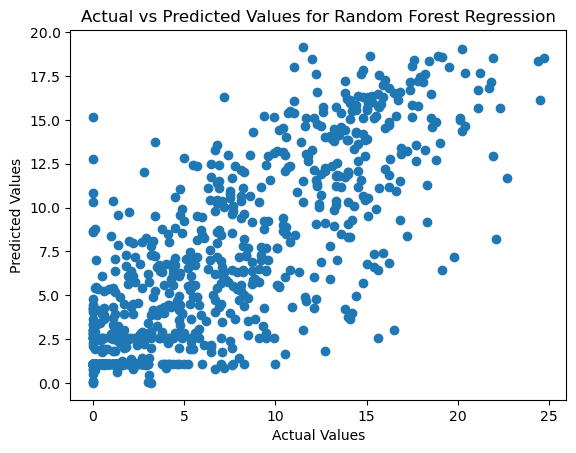

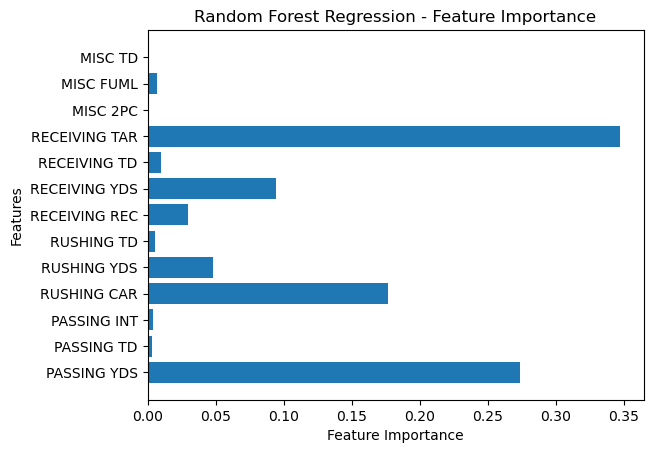

In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

# Load the cleaned dataset
df = pd.read_csv('FantasyFootballWeekly_cleaned.csv')

# Choose features (X) and target (y)
features = df[['PASSING YDS', 'PASSING TD', 'PASSING INT', 'RUSHING CAR', 'RUSHING YDS', 'RUSHING TD',
               'RECEIVING REC', 'RECEIVING YDS', 'RECEIVING TD', 'RECEIVING TAR',
               'MISC 2PC', 'MISC FUML', 'MISC TD']]
target = df['PROJ']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Calculate and print the Mean Squared Error (MSE) and R2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R2 Score: {r2}')

# Plotting actual vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values for Random Forest Regression')
plt.show()

# Feature importance plot
feature_importance = rf_model.feature_importances_
features_list = features.columns

plt.barh(features_list, feature_importance)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Random Forest Regression - Feature Importance')
plt.show()


### Support Vector Machine Regression

Mean Squared Error: 34.53
R2 Score: 0.05


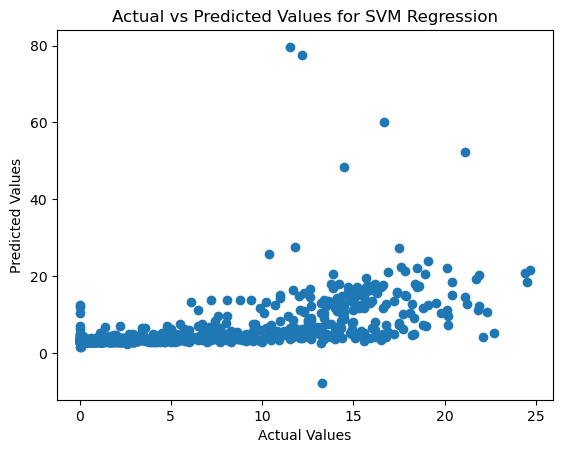

In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the cleaned dataset
df = pd.read_csv('FantasyFootballWeekly_cleaned.csv')

# Select features and target variable
features = df[['PASSING_C', 'PASSING_A', 'PASSING YDS', 'PASSING TD', 'PASSING INT', 'RUSHING CAR', 'RUSHING YDS', 'RUSHING TD',
               'RECEIVING REC', 'RECEIVING YDS', 'RECEIVING TD', 'RECEIVING TAR', 'MISC 2PC', 'MISC FUML', 'MISC TD']]
target = df['PROJ']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the Support Vector Machine model
svm_model = SVR(kernel='poly')  # You can try different kernels ('linear', 'rbf', etc.)
svm_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R2 Score: {r2:.2f}')

# Visualize actual vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values for SVM Regression')
plt.show()


# Unsupervised Learning

### K-means Clustering

c:\Users\admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



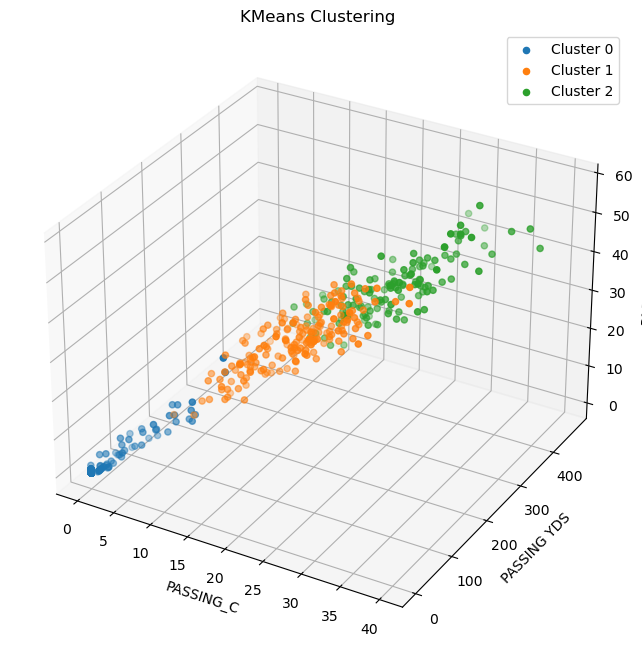

In [53]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the cleaned dataset
df = pd.read_csv('FantasyFootballWeekly_cleaned.csv')

# Select features for clustering (example, you might want to modify this based on your data)
features = df[['PASSING_C', 'PASSING YDS', 'PASSING_A']]

# Choose the number of clusters
num_clusters = 3

# Fit KMeans model
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['cluster'] = kmeans.fit_predict(features)

# Visualize the clusters in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for each cluster
for cluster in range(num_clusters):
    cluster_data = features[df['cluster'] == cluster]
    ax.scatter(cluster_data['PASSING_C'], cluster_data['PASSING YDS'], cluster_data['PASSING_A'], label=f'Cluster {cluster}')

ax.set_xlabel('PASSING_C')
ax.set_ylabel('PASSING YDS')
ax.set_zlabel('PASSING_A')
ax.set_title('KMeans Clustering')
ax.legend()

plt.show()


### Principal Component Analysis

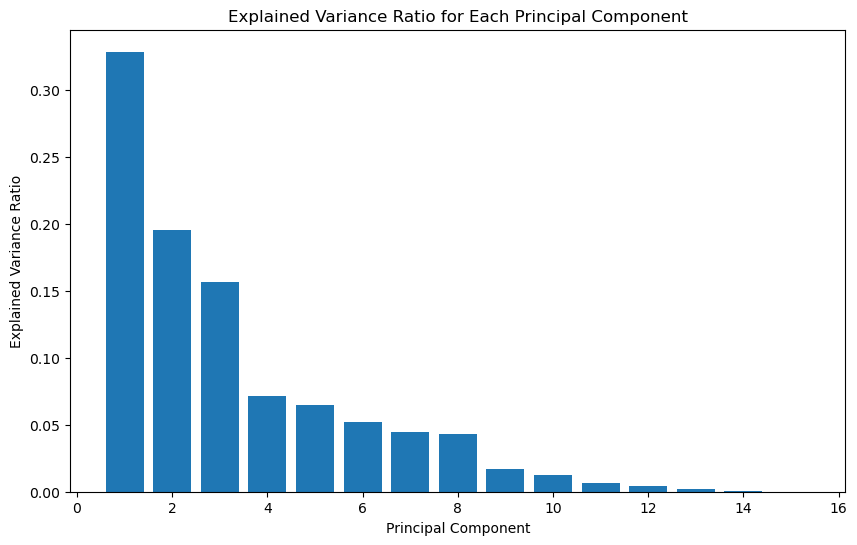

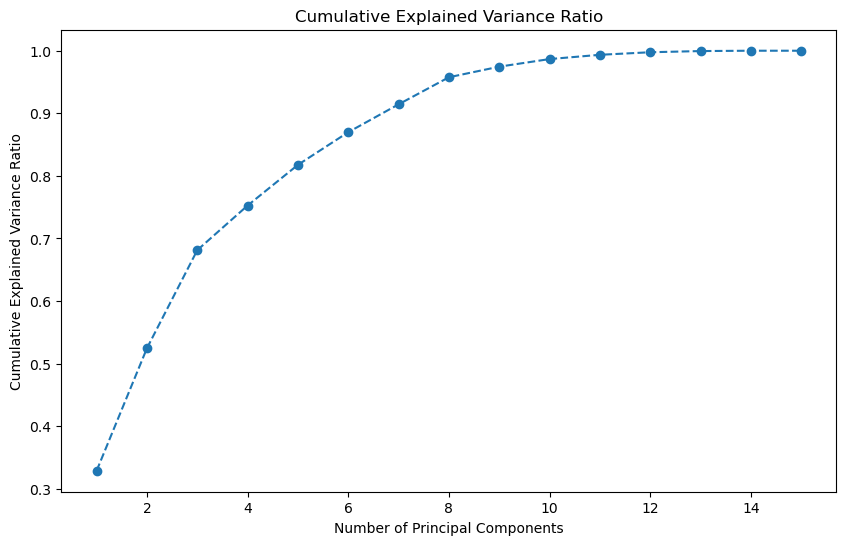

Principal Component 1 Weights:
PASSING_C: 0.429
PASSING_A: 0.429
PASSING YDS: 0.429
PASSING TD: 0.368
PASSING INT: 0.306
RUSHING CAR: 0.100
RUSHING YDS: 0.100
RUSHING TD: 0.089
RECEIVING REC: -0.231
RECEIVING YDS: -0.218
RECEIVING TD: -0.127
RECEIVING TAR: -0.237
MISC 2PC: 0.000
MISC FUML: 0.131
MISC TD: -0.004

Principal Component 2 Weights:
PASSING_C: 0.162
PASSING_A: 0.160
PASSING YDS: 0.165
PASSING TD: 0.148
PASSING INT: 0.118
RUSHING CAR: 0.183
RUSHING YDS: 0.186
RUSHING TD: 0.150
RECEIVING REC: 0.488
RECEIVING YDS: 0.471
RECEIVING TD: 0.314
RECEIVING TAR: 0.468
MISC 2PC: -0.000
MISC FUML: 0.128
MISC TD: -0.025

Principal Component 3 Weights:
PASSING_C: -0.132
PASSING_A: -0.132
PASSING YDS: -0.130
PASSING TD: -0.124
PASSING INT: -0.099
RUSHING CAR: 0.578
RUSHING YDS: 0.584
RUSHING TD: 0.445
RECEIVING REC: -0.080
RECEIVING YDS: -0.147
RECEIVING TD: -0.104
RECEIVING TAR: -0.102
MISC 2PC: -0.000
MISC FUML: 0.010
MISC TD: -0.008

Principal Component 4 Weights:
PASSING_C: 0.004
PASSING

In [65]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load the cleaned dataset
df = pd.read_csv('FantasyFootballWeekly_cleaned.csv')

# Select features for PCA (example, you might want to modify this based on your data)
features = df[['PASSING_C', 'PASSING_A', 'PASSING YDS', 'PASSING TD', 'PASSING INT', 'RUSHING CAR', 'RUSHING YDS', 'RUSHING TD',
               'RECEIVING REC', 'RECEIVING YDS', 'RECEIVING TD', 'RECEIVING TAR', 'MISC 2PC', 'MISC FUML', 'MISC TD']]

# Standardize the data
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

# Apply PCA
pca = PCA()
pca_result = pca.fit_transform(features_standardized)

# Plot explained variance ratio
plt.figure(figsize=(10, 6))
explained_variance_ratio = pca.explained_variance_ratio_
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio for Each Principal Component')

plt.show()

# Plot cumulative explained variance
cumulative_variance_ratio = pca.explained_variance_ratio_.cumsum()
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio')

plt.show()

# Access the weights of each feature in the principal components
component_weights = pca.components_

# Display the weights and their corresponding features
for i, weights in enumerate(component_weights):
    print(f'Principal Component {i + 1} Weights:')
    for feature, weight in zip(features.columns, weights):
        print(f'{feature}: {weight:.3f}')
    print()

Explained Variance Ratio Chart: Observe the drop-off in the explained variance ratio to identify the number of principal components that contribute significantly to the overall variance.

Cumulative Explained Variance Chart: Look for the point where the curve levels off, indicating diminishing returns in explained variance with additional principal components.

### Hierarchal 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

# Load your cleaned dataset
df = pd.read_csv('FantasyFootballWeekly_cleaned.csv')

# Extract features for clustering (you might choose different features based on your data)
features = df[['PASSING_C','PASSING_A' ,'PASSING YDS', 'RUSHING CAR', 'RECEIVING REC', 'MISC TD']]

# Standardize the features
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

# Choose the number of clusters (you might need to experiment with this)
n_clusters = 3

# Apply hierarchical clustering
model = AgglomerativeClustering(n_clusters=n_clusters)
cluster_labels = model.fit_predict(features_standardized)

# Silhouette score (a measure of how well-defined the clusters are)
silhouette_avg = silhouette_score(features_standardized, cluster_labels)
print(f"Silhouette Score: {silhouette_avg}")

# Create a dendrogram to visualize the hierarchical clustering
linked = linkage(features_standardized, 'ward')
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
plt.show()

# Add cluster labels to the DataFrame
df['Cluster'] = cluster_labels

# Explore the clusters
cluster_counts = df['Cluster'].value_counts()
print("\nCluster Counts:")
print(cluster_counts)


Silhouette Score: 0.7567688750393318


## ChatGPT Recommendations

Based on the recommendations from ChatGPT, the following changes were made to the Machine Learning Models:

1. Splitting the Linear Regression model by player position, so that relevant data could be conducted and give accurate results based on the player position.
2. Trying out different kernels for the Support Vector Machine Model in order to find the best one. It was concluded that 'poly' would give the lowest R2 value and Linear would give the Lowest MSE
